## Welcome to the Hospital De Vitoria Case Study!

The Hospital De Vitoria serves the region of Vitoria in Brazil.  In an effort to improve the level of service offered at their hospitals, this state institution aims to minimize the number of medical appointments missed by pations.  For this purpose, we have been tasked with identifying the variables that can help us run a prediction of what patients will be a 'Now Show' to their appointment.


## 1. DATA CLEANSING

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as pylab
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np
import statsmodels.api as sm

In [3]:
dataframe = pd.read_csv('No Show Capstone.csv')

In [4]:
dataframe.shape

(110527, 14)

In [5]:
dataframe.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


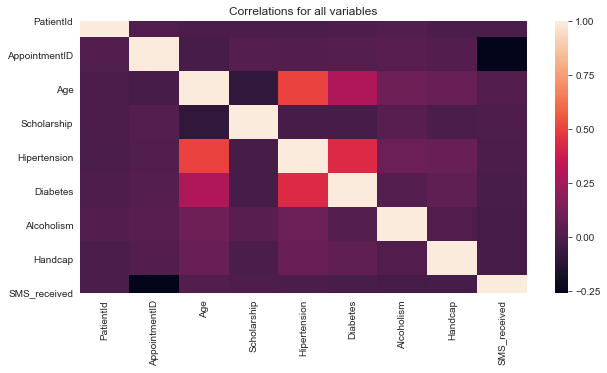

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(dataframe.corr())
plt.title("Correlations for all variables")
plt.show()

In [8]:
dataframe.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [8]:
dataframe.PatientId = dataframe.PatientId.apply(lambda patient: str(int(patient)))

In [9]:
dataframe.ScheduledDay = pd.to_datetime(dataframe.ScheduledDay)
dataframe.AppointmentDay = pd.to_datetime(dataframe.AppointmentDay)
dataframe['WaitTime'] = (dataframe.AppointmentDay - dataframe.ScheduledDay).dt.days
dataframe['NoShow'] = dataframe['No-show'].apply(lambda x: 0 if x =="No" else 1)
dataframe['Genders'] = dataframe['Gender'].apply(lambda x: 0 if x =="M" else 1)
dataframe['Weekday'] = dataframe.AppointmentDay.map(lambda day: day.day_name())

dataframe.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitTime,NoShow,Genders
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.183702,0.201933,0.649977
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996,0.401444,0.476979
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000,1.000000,1.000000


In [10]:
dataframe = dataframe.query('Age >= 0')
print(sorted(dataframe.Age.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [11]:
dataframe.loc[dataframe.Handcap > 1, 'Handcap'] = 1
dataframe.Handcap.unique()

array([0, 1], dtype=int64)

In [12]:
dataframe.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitTime,NoShow,Genders
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,9.183794,0.201934,0.649974
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,15.255034,0.401445,0.476980
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178.000000,1.000000,1.000000


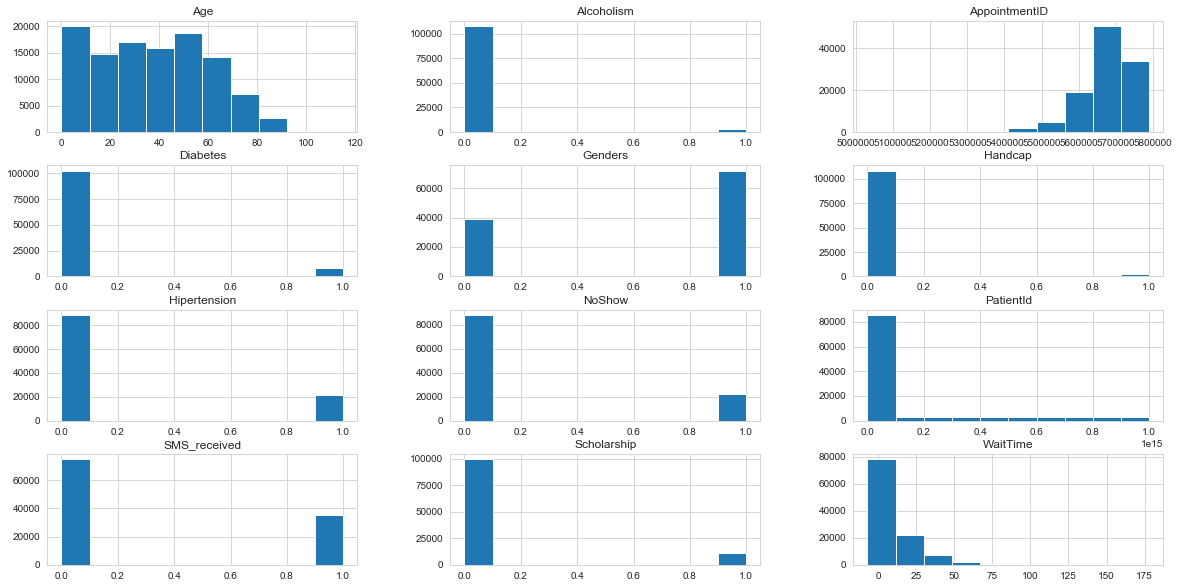

In [13]:
dataframe.hist(figsize=(20, 10));

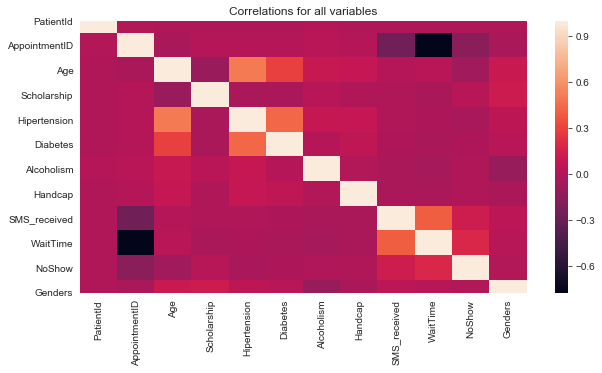

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(dataframe.corr())
plt.title("Correlations for all variables")
plt.show()

Text(0.5, 1.0, 'Correlated feature against No Show')

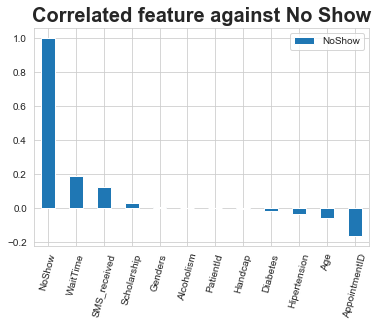

In [15]:
DFC = dataframe.corr()
DFC.sort_values('NoShow', ascending=False).plot.bar(y='NoShow', rot=75)
plt.title("Correlated feature against No Show",fontweight="bold",fontsize=20)

In [16]:
print(dataframe.head())

      PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  \
0             1         0           0        0             0      No   
1             0         0           0       

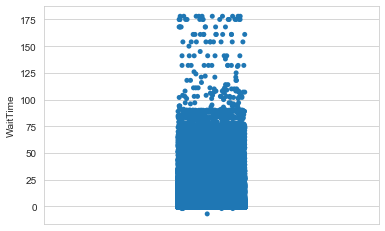

In [17]:
sns.stripplot(data=dataframe, y = "WaitTime", jitter = True)

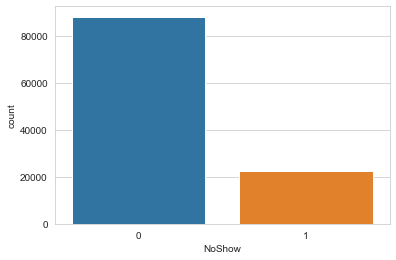

In [18]:
sns.countplot(x='NoShow', data=dataframe)

## A HISTORY OF "NO SHOWS"

In [19]:
dataframe['NoShow_Hist'] = dataframe.groupby('PatientId')['NoShow'].apply(lambda x: x.cumsum())

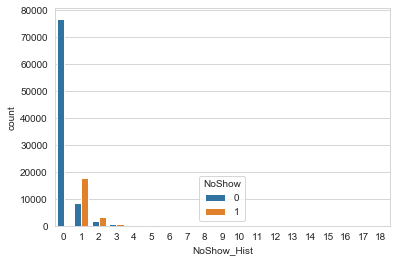

In [20]:
NH = sns.countplot(x='NoShow_Hist', hue='NoShow', data=dataframe)

Text(0.5, 1.0, 'Correlated feature against No Show')

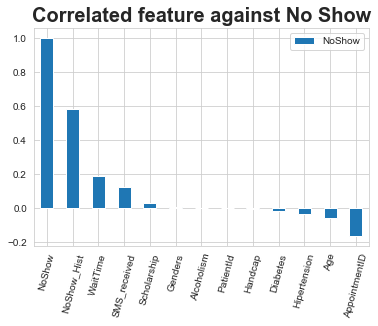

In [21]:
DFC = dataframe.corr()
DFC.sort_values('NoShow', ascending=False).plot.bar(y='NoShow', rot=75)
plt.title("Correlated feature against No Show",fontweight="bold",fontsize=20)

Previous missed appointments is a significant variable.  This warrants futher analysis to find out how Vitoria hospitals can address this variable.

## WHAT IS THE EFFECT OF TEXT MESSAGE REMINDERS?

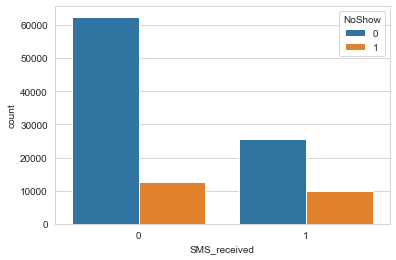

In [22]:
TM = sns.countplot(x='SMS_received', hue='NoShow', data=dataframe)

SMS message reminders do not seem to have a positive effect on missed appoinments.  On the contrary, patients who do not receive an SMS reminder seem to attend their appoinment at a higher rate.  This may be explained by the fact that they have a shorter wait time.

## ARE HANDICAPS TO BLAME FOR "NO SHOWS"

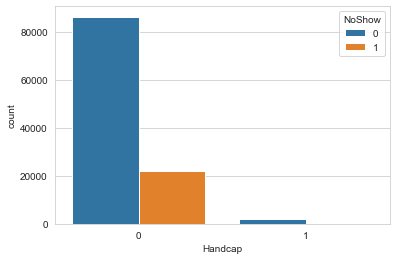

In [23]:
ax = sns.countplot(x=dataframe.Handcap, hue=dataframe.NoShow)

The number of patients identified with a handicap is insignficant; therefore, a further study of this cause will no longer be continued.

# The Effect of Age

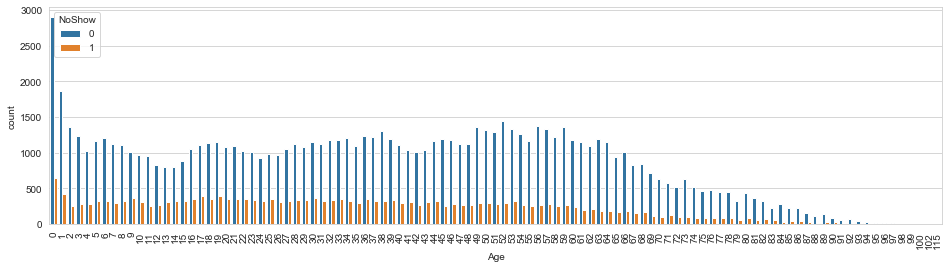

In [25]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=dataframe.Age, hue=dataframe.NoShow)

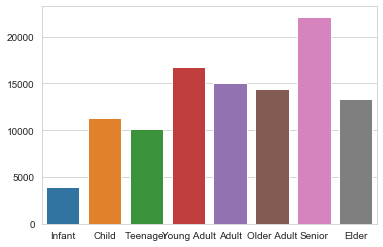

In [26]:
Abin = [0, 2, 10, 18, 30, 40, 50, 65, 100]
Alabel = ["Infant", "Child", "Teenager", "Young Adult", "Adult", "Older Adult", "Senior", "Elder"]
pat_age = pd.cut(dataframe.Age, Abin, labels=Alabel)
dataframe['pat_age']= pat_age

groups= dataframe.groupby(['pat_age'])
gps= groups.size()
ax= sns.barplot(x=gps.index.tolist(), y=gps.values)

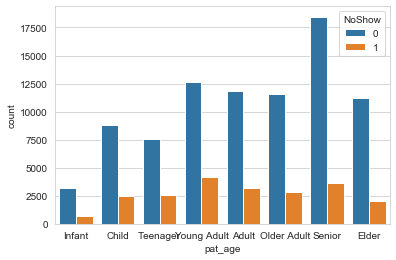

In [28]:
WP = sns.countplot(x='pat_age', hue='NoShow', data=dataframe)
plt.show()

In [29]:
age_groups = dataframe.groupby(pd.cut(dataframe.Age, Abin))
age_groups['NoShow'].mean()

Age
(0, 2]       0.171421
(2, 10]      0.219277
(10, 18]     0.252941
(18, 30]     0.247122
(30, 40]     0.214722
(40, 50]     0.199029
(50, 65]     0.165491
(65, 100]    0.155183
Name: NoShow, dtype: float64

Age is an imprtant variable because it is clear that teenagers and young adults tend to miss a large number of appointments.  Therefore, it may be helpful to target these populations for SMS reminders.  

# The Effect of Waiting Time

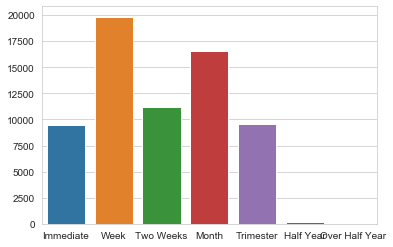

In [30]:
bins = [0, 2, 7, 14, 30, 90, 180, 99999]
labels = ["Immediate","Week", "Two Weeks", "Month", "Trimester", "Half Year", "Over Half Year"]
wait_period = pd.cut(dataframe.WaitTime, bins, labels=labels)
dataframe['wait_period'] = wait_period

groups = dataframe.groupby(['wait_period'])
gps = groups.size()
ax = sns.barplot(x=gps.index.tolist(), y=gps.values)

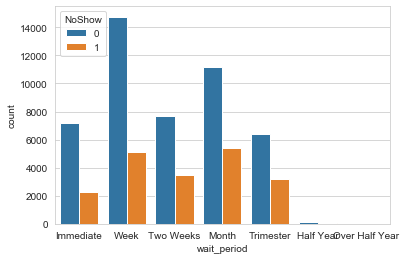

In [31]:
WP = sns.countplot(x='wait_period', hue='NoShow', data=dataframe)
plt.show()

In [33]:
wait_time = dataframe.groupby(pd.cut(dataframe.WaitTime, bins))
wait_time["NoShow"].mean()

WaitTime
(0, 2]          0.237371
(2, 7]          0.256174
(7, 14]         0.312254
(14, 30]        0.325212
(30, 90]        0.331168
(90, 180]       0.273292
(180, 99999]         NaN
Name: NoShow, dtype: float64

An analysis of the time between the scheduling of an appointment and the actual appointment day seem to suggest that the longer the wait time, the higher the possibility of a missed appoinment.

## OTHER CONTRIBUTING FACTORS

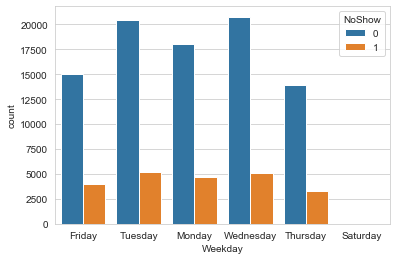

In [34]:
WA = sns.countplot(x='Weekday', hue='NoShow', data=dataframe)
plt.show()

It seems like appointment day does not have a significant effect on missed appointments.  THere seems to be an increase in missed appointments during the week, but that correlates with the fact that there are more appoinments scheduled for those days to begin with.

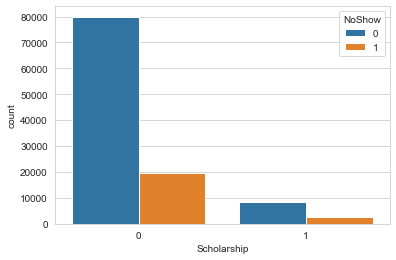

In [35]:
SM = sns.countplot(x='Scholarship', hue='NoShow', data=dataframe)
plt.show()

In [36]:
Exploratory_Analysis = ['Gender', 'SMS_received', 'Weekday', 'Scholarship']
for r in Exploratory_Analysis :
    print(dataframe.groupby(r)['NoShow'].mean())

Gender
F    0.203149
M    0.199679
Name: NoShow, dtype: float64
SMS_received
0    0.167035
1    0.275745
Name: NoShow, dtype: float64
Weekday
Friday       0.212261
Monday       0.206481
Saturday     0.230769
Thursday     0.193541
Tuesday      0.200936
Wednesday    0.196892
Name: NoShow, dtype: float64
Scholarship
0    0.198074
1    0.237363
Name: NoShow, dtype: float64


This quick analysis of some of the key variables reveals that SMS_received seem to correlate with missing appointments.  Additionally, scholarship seems to correlate with missed appointments.

## INSIGHTS

Text(0.5, 1.0, 'Correlated feature against No Show')

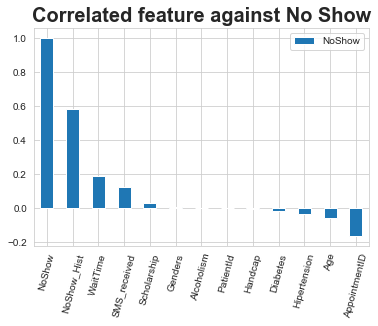

In [39]:
DFC = dataframe.corr()
DFC.sort_values('NoShow', ascending=False).plot.bar(y='NoShow', rot=75)
plt.title("Correlated feature against No Show",fontweight="bold",fontsize=20)

The three most significant variables to predict missed appointments are the following: 

I.  A History of Missed Appointments - The rate of missed appointments for patients with a history of missed appointments is significantly higher than the rate of patients with no such history.
II. Wait Time - Patients who scheduled an appointment with more than one week of anticipation, missed their appointments at a rate of over 30 percent, compared to patients scheduled only one week before, they only missed 25 percent of their appointments.
III. Age - Younger adults tend to miss more appointments than older adults.  This make sense because younger adults may prioritize work and school, while older adults value their health more.

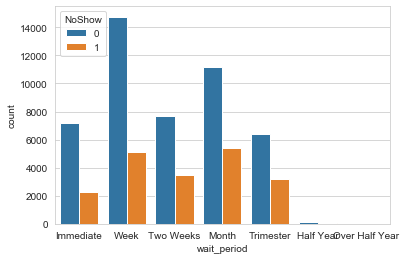

In [40]:
WP = sns.countplot(x='wait_period', hue='NoShow', data=dataframe)
plt.show()

There exists a clear variation in variable significance when contrasting the behavior of No Shows within each time period.

1.  Immediate Appointments - Appointments made for the same day do not show a large correlation for missed appointments.  
2.  Week to Trimester - Appointments made with more than one week of anticipation show that the more time between appointment scheduled and appointment day, the more likely it is that the appointment will be a No Show.  This issue can be addressed by updating a reminder system that includes SMS reminders, Email reminders, and Phone call reminders on or around the day of the appointment.

In [41]:
age_groups = dataframe.groupby(pd.cut(dataframe.Age, Abin))
age_groups['NoShow'].mean()

Age
(0, 2]       0.171421
(2, 10]      0.219277
(10, 18]     0.252941
(18, 30]     0.247122
(30, 40]     0.214722
(40, 50]     0.199029
(50, 65]     0.165491
(65, 100]    0.155183
Name: NoShow, dtype: float64

Age seems to be a signficant variable because there exists a signficant increase in the average missed appointments for young adults.

1.  Patients older than 40 years old seem to attend their appointmemnts at an acceptable rates.  These rates can be improved by developing a reminder system that confirms with the patient one day prior to the appointment.
2.  Patients between 10 and 30 years old miss appointments at a rate of 25%, which is the highest of all age groups.  Therefore, it is imperative to make sure that young adults receive multiple reminders as the date of the appointments is approahing.  